# Case Study : Questions

1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

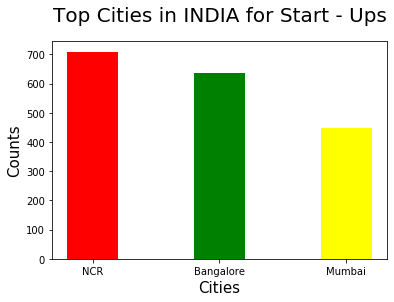

Location  Investment
NCR          709
Bangalore    637
Mumbai       449
dtype: int64


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("startup_funding.csv")
df = data.copy()

df = df[pd.notnull(df['CityLocation'])]
df.CityLocation.replace("bangalore","Bangalore", inplace = True)

jay = {}
for i in df['CityLocation']:
    temp = i.split('/')
    for j in temp:
        temp1 = j.strip()
        if temp1 in ['Delhi', 'New Delhi', 'Gurgaon', 'Noida']:
            temp1 = 'NCR'
        jay[temp1] = jay.get(temp1, 0) + 1
        
sorted_jay = dict(sorted(jay.items(), key = lambda x: x[1], reverse = True)[:3])

x = [i for i in sorted_jay.keys()]
y = [i for i in sorted_jay.values()]
c = ['red', 'green', 'yellow']
plt.bar(x, y, width = 0.4, color = c)
plt.title('Top Cities in INDIA for Start - Ups', fontsize = 20, pad = 20)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

print('\033[1m'+'Location',' Investment')  # '\033[1m' for bold letters
print(pd.Series(sorted_jay))

2. Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.


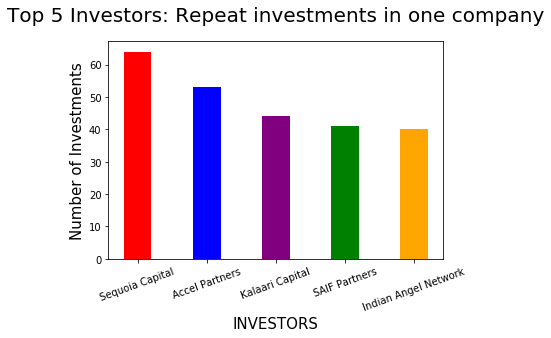

INVESTORS 	  Number of Investments
Sequoia Capital         64
Accel Partners          53
Kalaari Capital         44
SAIF Partners           41
Indian Angel Network    40
dtype: int64


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
df = df[pd.notnull(df['InvestorsName'])]
jay = {}
for i in df['InvestorsName']:
    temp = i.split(',')
    for j in temp:
        if j in ['', 'Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor']:
            continue
        temp1 = j.strip()
        jay[temp1] = jay.get(temp1, 0) + 1

sorted_jay = dict(list(sorted(jay.items(), key = lambda x: x[1], reverse = True))[:5])

x = [i for i in sorted_jay.keys()]
y = [i for i in sorted_jay.values()]
c = ['r', 'b', 'purple', 'g', 'orange']
plt.bar(x, y, width = 0.4, color = c)
plt.xticks(rotation = 20)
plt.title('Top 5 Investors: Repeat investments in one company', fontsize = 20, pad = 20)
plt.xlabel('INVESTORS', fontsize = 15)
plt.ylabel('Number of Investments', fontsize = 15)
plt.show()

print('\033[1m'+'INVESTORS', '\t', ' Number of Investments')    # '\033[1m' for bold letters
print(pd.Series(sorted_jay))

3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.


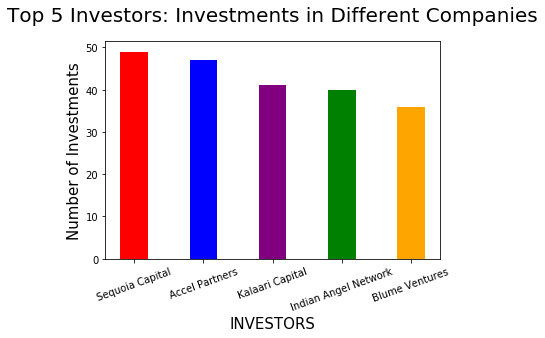

INVESTORS 	  Number of Investments
Sequoia Capital         49
Accel Partners          47
Kalaari Capital         41
Indian Angel Network    40
Blume Ventures          36
dtype: int64


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
df = df[pd.notnull(df['InvestorsName'])]
df = df[pd.notna(df['StartupName'])]
df['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)

a = list(df['StartupName'])
b = []
for i in df['InvestorsName']:
    i = i.split(',')
    c = []
    for j in i:
        c.append(j.strip())
    b.append(c)
    
jay = {}
for i in range(len(b)):
    Investor = b[i]
    Startup = a[i]
    for j in Investor:
        if j in jay:
            jay[j].add(Startup)
        else:
            jay[j] = set()
            jay[j].add(Startup)

jay1 = {}
for k,v in jay.items():
    jay1[k] = len(v)

sorted_jay1 = dict(list(sorted(jay1.items(), key = lambda x:x[1], reverse = True))[:6])
del sorted_jay1['']

x = [i for i in sorted_jay1.keys()]
y = [i for i in sorted_jay1.values()]
c = ['r', 'b', 'purple', 'g', 'orange']
plt.bar(x, y, width = 0.4, color = c)
plt.xticks(rotation = 20)
plt.title('Top 5 Investors: Investments in Different Companies', fontsize = 20, pad = 20)
plt.xlabel('INVESTORS', fontsize = 15)
plt.ylabel('Number of Investments', fontsize = 15)
plt.show()

print('\033[1m'+'INVESTORS', '\t', ' Number of Investments')    # '\033[1m' for bold letters
print(pd.Series(sorted_jay1))

4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.


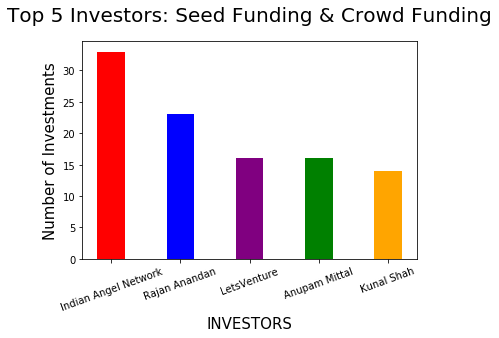

INVESTORS 	 Number of Investments
Indian Angel Network    33
Rajan Anandan           23
LetsVenture             16
Anupam Mittal           16
Kunal Shah              14
dtype: int64


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
df = df[pd.notnull(df['InvestorsName'])]
df = df[pd.notna(df['StartupName'])]
df = df[pd.notnull(df['InvestmentType'])]

df['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)

df[df['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
df[df['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
df[df['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
df = df[(df['InvestmentType'] == 'Seed Funding') | (df['InvestmentType'] == 'Crowd Funding')]

a = list(df['StartupName'])
b = []
for i in df['InvestorsName']:
    i = i.split(',')
    c = []
    for j in i:
        c.append(j.strip())
    b.append(c)
    
jay = {}
for i in range(len(b)):
    Investor = b[i]
    Startup = a[i]
    for j in Investor:
        if j in jay:
            jay[j].add(Startup)
        else:
            jay[j] = set()
            jay[j].add(Startup)

jay1 = {}
for k,v in jay.items():
    jay1[k] = len(v)

sorted_jay1 = dict(list(sorted(jay1.items(), key = lambda x:x[1], reverse = True))[:8])
del sorted_jay1['']
del sorted_jay1['Undisclosed Investors']
del sorted_jay1['Undisclosed investors']

x = [i for i in sorted_jay1.keys()]
y = [i for i in sorted_jay1.values()]
c = ['r', 'b', 'purple', 'g', 'orange']
plt.bar(x, y, width = 0.4, color = c)
plt.title('Top 5 Investors: Seed Funding & Crowd Funding', fontsize = 20, pad = 20)
plt.xlabel('INVESTORS', fontsize = 15)
plt.ylabel('Number of Investments', fontsize = 15)   
plt.xticks(rotation = 20)
plt.show()

print('\033[1m'+'INVESTORS', '\t', 'Number of Investments')     # '\033[1m' for bold letters
print(pd.Series(sorted_jay1))

5. Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

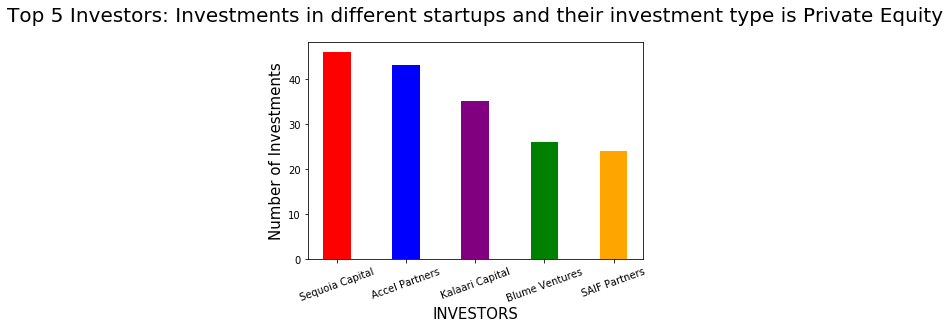

INVESTORS 	 Number of Investments
Sequoia Capital    46
Accel Partners     43
Kalaari Capital    35
Blume Ventures     26
SAIF Partners      24
dtype: int64


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
df = df[pd.notnull(df['InvestorsName'])]
df = df[pd.notna(df['StartupName'])]
df = df[pd.notnull(df['InvestmentType'])]

df['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)

df[df['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
df[df['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
df[df['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
df = df[(df['InvestmentType'] == 'Private Equity')]

a = list(df['StartupName'])
b = []
for i in df['InvestorsName']:
    i = i.split(',')
    c = []
    for j in i:
        c.append(j.strip())
    b.append(c)
    
jay = {}
for i in range(len(b)):
    Investor = b[i]
    Startup = a[i]
    for j in Investor:
        if j in jay:
            jay[j].add(Startup)
        else:
            jay[j] = set()
            jay[j].add(Startup)

jay1 = {}
for k,v in jay.items():
    jay1[k] = len(v)

sorted_jay1 = dict(list(sorted(jay1.items(), key = lambda x:x[1], reverse = True))[:5])

x = [i for i in sorted_jay1.keys()]
y = [i for i in sorted_jay1.values()]
c = ['r', 'b', 'purple', 'g', 'orange']
plt.bar(x, y, width = 0.4, color = c)
plt.title('Top 5 Investors: Investments in different startups and their investment type is Private Equity', fontsize = 20, pad = 20)
plt.xlabel('INVESTORS', fontsize = 15)
plt.ylabel('Number of Investments', fontsize = 15)
plt.xticks(rotation = 20)
plt.show()

print('\033[1m'+'INVESTORS', '\t', 'Number of Investments')       # '\033[1m' for bold letters
print(pd.Series(sorted_jay1))